## Flight Delay Predictions
### 1. Introduction 
Predicting the flights that are most likely to be delayed will help the airline company to promote customer satisfaction and prevent dissatisfied customer experience.
This Jupyter notebook presents all the steps that have been taken to analysis, and predict the flight delay for Compass airlines.

### 2. The Dataset
The data for this assignment consists of two datasets:
1. Flight performance data at Highland airport in December 2019.
2. Historical weather data in December 2019.
Data dictionaries are provided for each dataset in `.txt` files

### 3. Data preprocessing and merging

#### Setup
import the necessary libraries to read the data files and explor the data.

In [1]:
## import libraries 
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import datetime
import datetime, warnings, scipy
import seaborn as sns
from datetime import timedelta
import numpy as np


#### Flight Data 
1. Load the flight data
2. Check the shape of the dataset and explore the types of columns
3. Perform the basic statistics on the features to get a sense of feature means and ranges.


In [2]:
## Flight dataset

parse_dates = ['FlightDate']

flight_data = pd.read_csv('data/Flight_on_time_HIX.csv',
                 parse_dates=parse_dates)

print('Dataframe dimensions:', flight_data.shape)
flight_data.info()
flight_data.describe()



Dataframe dimensions: (65669, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65669 entries, 0 to 65668
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Airline                   65669 non-null  object        
 1   Flight_Number             65669 non-null  int64         
 2   Plane_ID                  65669 non-null  object        
 3   FlightDate                65669 non-null  datetime64[ns]
 4   Origin_Airport            65669 non-null  object        
 5   Destination_Airport       65669 non-null  object        
 6   Flight_Distance           65669 non-null  float64       
 7   Scheduled_Departure_Time  65669 non-null  int64         
 8   Actual_Departure_Time     65669 non-null  float64       
 9   Departure_Delay_Minutes   65669 non-null  float64       
 10  Departure_Taxi            65669 non-null  float64       
 11  Departure_WheelsOff       65669 non-null  floa

,Flight_Number,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn
count,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,65669.000000,6.566900e+04,65669.000000,65669.000000
mean,4272.493170,692.798048,1305.444867,1314.054866,16.243052,21.114818,1344.385601,1471.367723,1461.438563,3.259466e+02,9.916460,1454.118153
std,1584.708511,502.328564,474.893882,484.243154,58.783502,11.900324,485.546072,504.200205,517.654681,1.929424e+04,7.789556,512.854299
min,1321.000000,67.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000
25%,2810.000000,299.000000,907.000000,917.000000,0.000000,14.000000,936.000000,1107.000000,1101.000000,0.000000e+00,5.000000,1056.000000
50%,4626.000000,599.000000,1304.000000,1313.000000,0.000000,18.000000,1329.000000,1455.000000,1454.000000,0.000000e+00,8.000000,1449.000000
75%,5420.000000,888.000000,1718.000000,1727.000000,7.000000,25.000000,1743.000000,1850.000000,1856.000000,1.000000e+01,12.000000,1848.000000
max,7613.000000,4243.000000,2359.000000,2400.000000,2710.000000,157.000000,2400.000000,2359.000000,2400.000000,2.510000e+06,160.000000,2400.000000


In [3]:
flight_data.head()

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason
0,TR,4135,GJLOAB,2019-12-01,IYF,HIX,678.0,1,103.0,62.0,15.0,118.0,127,219.0,52.0,7.0,212.0,LateAircraft
1,TR,3776,GDISCI,2019-12-01,HEN,HIX,1700.0,10,25.0,15.0,21.0,46.0,616,624.0,8.0,27.0,557.0,NaN
2,RO,4754,GHHWLL,2019-12-01,HIX,IZN,413.0,10,10.0,0.0,15.0,25.0,242,227.0,0.0,5.0,222.0,NaN
3,XM,5604,GBGWFC,2019-12-01,HIX,IZU,130.0,10,44.0,34.0,34.0,118.0,111,155.0,44.0,4.0,151.0,Weather
4,XM,5612,GBISBC,2019-12-01,HIX,LKF,258.0,10,234.0,144.0,26.0,300.0,132,358.0,146.0,6.0,352.0,Carrier


#### Weather Data 
1. Load the weather data
2. Check the shape of the dataset and explore the types of columns
3. Perform the basic statistics on the features to get a sense of feature means and ranges.


In [4]:
## Weather Data
weather_path = 'data/weather.csv'
weather_data = pd.read_csv(weather_path, parse_dates=['time'])

print('Dataframe dimensions:', weather_data.shape)
weather_data.info()

Dataframe dimensions: (1536, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1536 non-null   int64         
 1   airport              1536 non-null   object        
 2   time                 1536 non-null   datetime64[ns]
 3   summary              1536 non-null   object        
 4   precipIntensity      1536 non-null   float64       
 5   precipProbability    1536 non-null   float64       
 6   temperature          1536 non-null   float64       
 7   apparentTemperature  1536 non-null   float64       
 8   dewPoint             1536 non-null   float64       
 9   humidity             1536 non-null   float64       
 10  pressure             1536 non-null   float64       
 11  windSpeed            1536 non-null   float64       
 12  windGust             1536 non-null   float64       
 13  

In [5]:
weather_data.drop('Unnamed: 0', axis=1, inplace=True)
weather_data.drop('time2', axis=1, inplace=True)

weather_data.describe()

,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipAccumulation
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,81.000000
mean,0.003304,0.117331,35.510918,29.115749,25.139629,0.675007,1016.511283,9.527930,11.326413,228.107328,0.598086,0.210938,9.083046,333.793210,0.044423
std,0.012533,0.303385,9.452021,12.087124,12.464821,0.155994,10.804320,4.448901,6.424565,82.520152,0.372036,0.420684,2.194884,30.406867,0.062452
min,0.000000,0.000000,11.530000,-2.150000,-13.040000,0.220000,985.900000,0.120000,0.260000,0.007128,0.000000,0.000000,0.498000,268.570000,0.001400
25%,0.000000,0.000000,29.850000,21.665000,17.982500,0.570000,1009.160000,6.460000,7.167500,190.030115,0.190000,0.000000,9.967750,310.827500,0.005600
50%,0.000000,0.000000,35.150000,28.445000,25.405000,0.700000,1018.075000,9.150000,10.250000,234.514672,0.690000,0.000000,10.000000,332.660000,0.016100
75%,0.000000,0.000000,40.490000,35.472500,32.330000,0.800000,1024.320000,12.100000,13.810000,291.075677,0.980000,0.000000,10.000000,353.605000,0.060000
max,0.129200,1.000000,62.120000,62.140000,55.840000,1.000000,1040.360000,24.770000,36.970000,359.077229,1.000000,2.000000,10.000000,423.560000,0.356200


In [6]:
# Data preprocessing
# 1. Check the airports names in weather dataset.
# 2. Replace the airport name to match the airport name in Flight dataset.
# 3. Additional time features are added in order to identify possible trends.

print("Nb of airports: {}".format(len(weather_data['airport'].unique())))

weather_data['Origin_Airport'] = weather_data['airport'].replace(['Highland'],'HIX')
weather_data.loc[:, 'date'] = weather_data['time'].dt.date
weather_data.loc[:, 'hour'] = weather_data['time'].dt.hour
weather_data.head()

# 1. Get flight data for Compass airline where origin airport airport is HIX.
# 2. Additional time features are added in order to identify possible trends.
# 3. Merge flight, weather datasets and save the file Based on date, hour and origin airport location.
#    considering that the weather data avaliable instantly.
# 4. Add additional column `flight_delayed` to the merged dataset which indicate if the flight has departure delay 15 minutes or more.
# 5. Save the merged 

flight_data = flight_data.loc[(flight_data['Origin_Airport'] == 'HIX') & (flight_data['Airline'] == 'CA')]

print(flight_data.shape)

flight_data['hour'] = pd.to_datetime(flight_data['Scheduled_Departure_Time'], format='%H%M', errors='ignore').dt.hour
flight_data['date'] = flight_data['FlightDate'].dt.date
flight_data['day']=flight_data['FlightDate'].apply(lambda x:x.weekday()) 




flight_weather_data = flight_data.merge(weather_data, how='left', on=['date', 'hour','Origin_Airport'])
flight_weather_data['flight_delayed'] = flight_weather_data['Departure_Delay_Minutes'].apply(lambda x: 1 if (x >= 15) else 0)


flight_weather_data.to_csv('./data/merged_data.csv', index=False, float_format='%g')

Nb of airports: 2
(5256, 18)


In [7]:
flight_weather_data.isnull().sum()


Airline                        0
Flight_Number                  0
Plane_ID                       0
FlightDate                     0
Origin_Airport                 0
Destination_Airport            0
Flight_Distance                0
Scheduled_Departure_Time       0
Actual_Departure_Time          0
Departure_Delay_Minutes        0
Departure_Taxi                 0
Departure_WheelsOff            0
Scheduled_Arrival_Time         0
Actual_Arrival_Time            0
Arrival_Delay_Minutes          0
Arrival_Taxi                   0
Arrival_WheelsOn               0
Delay_Reason                3940
hour                           0
date                           0
day                            0
airport                        0
time                           0
summary                        0
precipIntensity                0
precipProbability              0
temperature                    0
apparentTemperature            0
dewPoint                       0
humidity                       0
pressure  

In [8]:
flight_weather_data.shape

(5256, 41)

## 3. Data Analysis 
Below are various charts to discover possible variables impacting flight delays.

### 3.1  Percentage of flights that are delayed.

On-time flights percentage: 0.763%
Delayed flights percentage: 0.237%


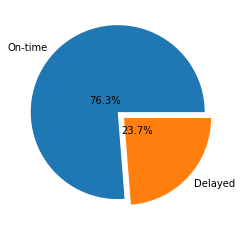

In [9]:
# Calculate the percentage of on time verse delayed flights. 

data = flight_weather_data.groupby("flight_delayed")['flight_delayed'].count()
print('On-time flights percentage: {:.3f}%'.format(data[0]/(data[0]+data[1])))
print('Delayed flights percentage: {:.3f}%'.format(data[1]/(data[0]+data[1])))
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=["On-time","Delayed"], pctdistance=0.2);


`23.7` delayed flights for `CA` airlines where the destination or origin airport is `HIX`.

We see `76.3%` of flights are on-time. Still, a fairly high proportion of `23.7%` of flights are delayed.
* Note delayed here means 15 minutes or more late!



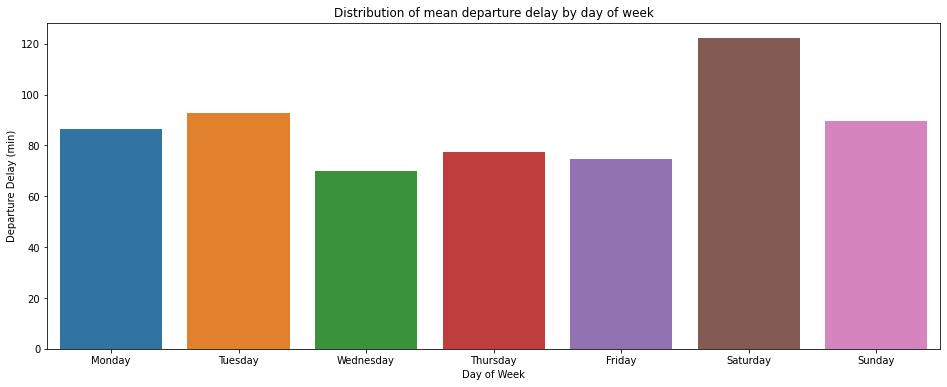

In [10]:
# Average Delay for flights per weekday.

# Get delayed flights.
# Group delayed flights per day and calculate the mean departure delay 

delayed_flights = flight_weather_data.loc[flight_weather_data['flight_delayed'] == 1]
grouped = delayed_flights[['Departure_Delay_Minutes', 'day']].groupby('day').mean()

plt.figure(figsize=(16, 6))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
chart = sns.barplot(x=grouped.reset_index()["day"], y='Departure_Delay_Minutes', data=grouped)
chart.set_xticklabels(days)
chart.set_xlabel('Day of Week')
chart.set_ylabel('Departure Delay (min)')
chart.set_title('Distribution of mean departure delay by day of week')
plt.show()



This chart shows the average departure delay in minutes for flight delays, grouped by day of week.
It appears from the chart that  `Saturday`, `Tuesday`, and `Thursday` are the worst days to fly,
with respect to the average flight delay.

To ensure this is not due to a larger volume of flights on those days.
I will plot the total number of flights per weekday in the dataset.

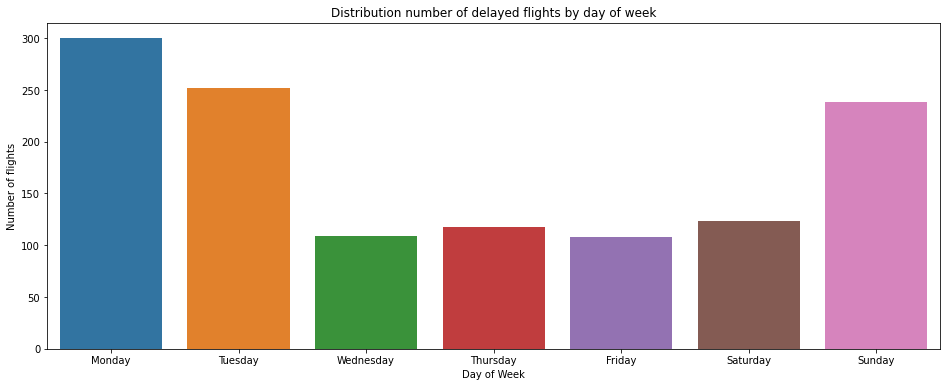

In [11]:
# Average Delay for flights per weekday.

# Get delayed flights.
# Group delayed flights per day and calculate the mean departure delay 

delayed_flights = flight_weather_data.loc[flight_weather_data['flight_delayed'] == 1]
grouped = delayed_flights[['Departure_Delay_Minutes', 'day']].groupby('day').count()

plt.figure(figsize=(16, 6))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
chart = sns.barplot(x=grouped.reset_index()["day"], y='Departure_Delay_Minutes', data=grouped, ci=None)
chart.set_xticklabels(days)
chart.set_xlabel('Day of Week')
chart.set_ylabel('Number of flights')
chart.set_title('Distribution number of delayed flights by day of week')
plt.show()



There is not an obvious correlation between volume of flights and which days experience larger flight delays.
This means the distribution of delayed flights is very skewed.


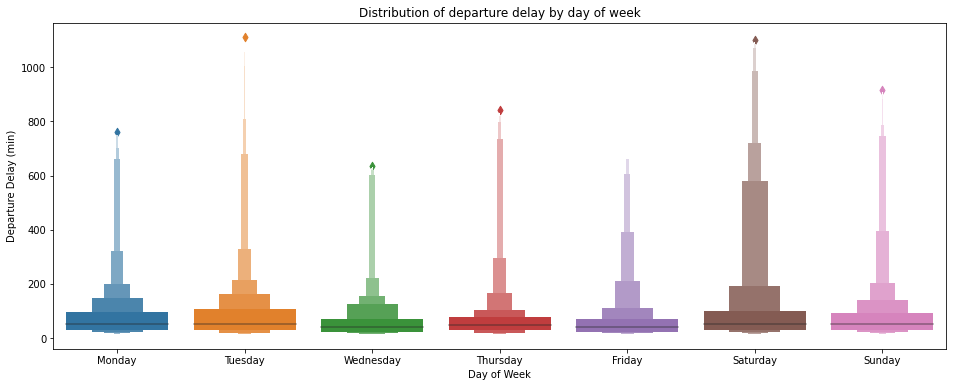

In [12]:
plt.figure(figsize=(16, 6))
delayed_flights = flight_weather_data.loc[flight_weather_data['flight_delayed'] == 1]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
chart = sns.boxenplot(x='day', y='Departure_Delay_Minutes', data=delayed_flights)
chart.set_xticklabels(days)
chart.set_xlabel('Day of Week')
chart.set_ylabel('Departure Delay (min)')
chart.set_title('Distribution of departure delay by day of week')
plt.show()

The above chart shows a more detailed distribution of delayed flights per each weekday.

This shows that `Tuesday` has some extremely large outlier values that play a role in their higher average flight delays.


Also `Saturday` and `Sunday` have "wider" and "higher" blocks at moderately higher flight delay levels. This contributes to the higher average flight delays and tells us that outliers alone are not fully to blame for the higher average delays on these days.

In [13]:


flight_weather_data.isnull().sum()



Airline                        0
Flight_Number                  0
Plane_ID                       0
FlightDate                     0
Origin_Airport                 0
Destination_Airport            0
Flight_Distance                0
Scheduled_Departure_Time       0
Actual_Departure_Time          0
Departure_Delay_Minutes        0
Departure_Taxi                 0
Departure_WheelsOff            0
Scheduled_Arrival_Time         0
Actual_Arrival_Time            0
Arrival_Delay_Minutes          0
Arrival_Taxi                   0
Arrival_WheelsOn               0
Delay_Reason                3940
hour                           0
date                           0
day                            0
airport                        0
time                           0
summary                        0
precipIntensity                0
precipProbability              0
temperature                    0
apparentTemperature            0
dewPoint                       0
humidity                       0
pressure  

In [14]:
## Fill the missing data 
# According to the feature describtion empty `precipType` means clear weather, and empty `precipAccumulation` means zero.


flight_weather_data["precipType"].fillna("clear", inplace = True)
flight_weather_data["precipAccumulation"].fillna(0, inplace = True)


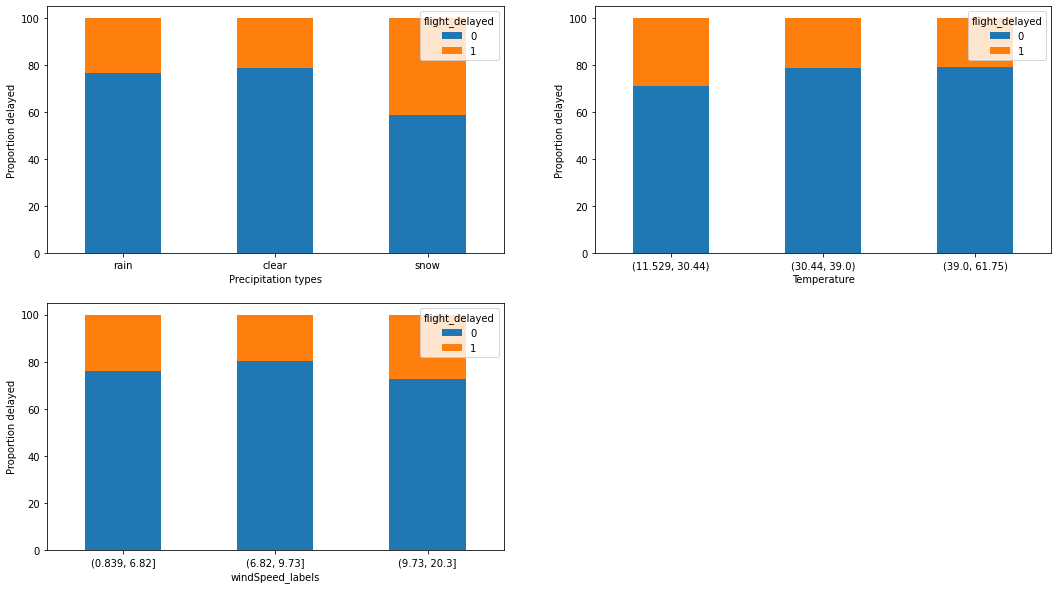

In [15]:
# create sub-plots for a few weather conditions
delayed_flights = flight_weather_data.loc[flight_weather_data['flight_delayed'] == 1]

ax = plt.subplot(221)
grouped = flight_weather_data['flight_delayed'].groupby(flight_weather_data['precipType']).value_counts()
g = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
chart = g.unstack().plot(kind='bar', stacked=True, figsize=(18, 10), ax=ax)
chart.set_xticklabels(flight_weather_data['precipType'].unique(), rotation=0)
chart.set_xlabel('Precipitation types')
chart.set_ylabel('Proportion delayed')


temperature_range = pd.qcut(flight_weather_data['temperature'], q=[0, 0.33, 0.66, 1])
ax = plt.subplot(222)
grouped = flight_weather_data['flight_delayed'].groupby(temperature_range).value_counts()
g = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
chart = g.unstack().plot(kind='bar', stacked=True, figsize=(18, 10), ax=ax)
chart.set_xticklabels(["(11.529, 30.44)", "(30.44, 39.0)","(39.0, 61.75)"], rotation=0)
chart.set_xlabel('Temperature')
chart.set_ylabel('Proportion delayed')

windSpeed_labels = pd.qcut(flight_weather_data['windSpeed'], q=[0, 0.33, 0.66, 1])

ax = plt.subplot(223)
grouped = flight_weather_data['flight_delayed'].groupby(windSpeed_labels).value_counts()
g = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
chart = g.unstack().plot(kind='bar', stacked=True, figsize=(18, 10), ax=ax)
chart.set_xticklabels(windSpeed_labels.unique(), rotation=0)
chart.set_xlabel('windSpeed_labels')
chart.set_ylabel('Proportion delayed')

plt.show()

It seems some weather events have an impact on flight delays.
Such as: 
1. `Precipitation types` when it is snow the number of delayed flights increased.
2. `Wind speeds` appear to impact flights once it gets above 9 MPHs. 
3. `Temperatures` between 11-30 degrees show increased impact on delays.


In [16]:
### Save data to csv file.
flight_weather_data.to_csv('data/combined_data.csv', index=False)

## Prediction of Flight Delays

In [17]:
# import 
from time import time
import itertools
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import cross_validate,GridSearchCV

from sklearn import ensemble, tree, metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from datetime import datetime, date
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
le = preprocessing.LabelEncoder()
rcParams['figure.figsize'] = 12, 4

In [18]:
# load data 
training = pd.read_csv('data/combined_data.csv')


In [19]:
# check data types
print (training.dtypes)


Airline                      object
Flight_Number                 int64
Plane_ID                     object
FlightDate                   object
Origin_Airport               object
Destination_Airport          object
Flight_Distance             float64
Scheduled_Departure_Time      int64
Actual_Departure_Time       float64
Departure_Delay_Minutes     float64
Departure_Taxi              float64
Departure_WheelsOff         float64
Scheduled_Arrival_Time        int64
Actual_Arrival_Time         float64
Arrival_Delay_Minutes       float64
Arrival_Taxi                float64
Arrival_WheelsOn            float64
Delay_Reason                 object
hour                          int64
date                         object
day                           int64
airport                      object
time                         object
summary                      object
precipIntensity             float64
precipProbability           float64
temperature                 float64
apparentTemperature         

In [20]:
# encode string class,Categorical values as integers 
training.Airline = le.fit_transform(training.Airline)
training.Plane_ID = le.fit_transform(training.Plane_ID)
training.Origin_Airport = le.fit_transform(training.Origin_Airport)
training.Destination_Airport = le.fit_transform(training.Destination_Airport)
training.precipType = le.fit_transform(training.precipType)
training.summary = le.fit_transform(training.summary)

# delete time data
training.drop('time', axis =1, inplace = True)
training.drop('FlightDate', axis =1, inplace = True)



print (training.dtypes)


Airline                       int64
Flight_Number                 int64
Plane_ID                      int64
Origin_Airport                int64
Destination_Airport           int64
Flight_Distance             float64
Scheduled_Departure_Time      int64
Actual_Departure_Time       float64
Departure_Delay_Minutes     float64
Departure_Taxi              float64
Departure_WheelsOff         float64
Scheduled_Arrival_Time        int64
Actual_Arrival_Time         float64
Arrival_Delay_Minutes       float64
Arrival_Taxi                float64
Arrival_WheelsOn            float64
Delay_Reason                 object
hour                          int64
date                         object
day                           int64
airport                      object
summary                       int64
precipIntensity             float64
precipProbability           float64
temperature                 float64
apparentTemperature         float64
dewPoint                    float64
humidity                    

In [21]:
# Define the features to use
## Excluding any feature that is related to departure except `Scheduled_Departure_Time` because prior to departure we 
## can't know any of them.

features = [c for c in training.columns if c in [
 'Flight_Number'
,'Plane_ID'
,'Origin_Airport'
,'Destination_Airport'
,'Flight_Distance'
,'Scheduled_Departure_Time'
,'Scheduled_Arrival_Time'
,'precipIntensity'
,'precipProbability'
,'temperature'
,'apparentTemperature'
,'dewPoint'
,'humidity'
,'pressure'
,'windSpeed'
,'windGust'
,'windBearing'
,'cloudCover'
,'uvIndex'
,'visibility'
,'ozone'
,'precipType'
,'precipAccumulation'
,'day'
,'hour']]

In [22]:
## split the data 
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(training[features], training['flight_delayed'], test_size=1 - train_ratio, random_state=42)

# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42) 




In [23]:
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(3679, 25) (788, 25) (789, 25)
(3679,) (788,) (789,)


In [24]:
# Running a quick naive bayes classifier on the smallest training set
naive = GaussianNB().fit(x_train, y_train)
naive_pred = naive.predict(x_test)
naive_probs = naive.predict_proba(x_test)

# Creates confustion matrix and prints it out
cm = metrics.confusion_matrix(y_test, naive_pred)
print("Confusion matrix")
print(pd.DataFrame(cm))

#Creates and print out the precision, recall, f1, and auc scores 
report_rf = metrics.precision_recall_fscore_support(list(y_test), 
                                                    list(naive_pred), 
                                                    average='binary')
print ("\nprecision = %0.2f\nrecall = %0.2f\nF1 = %0.2f\nAUC Score = %0.2f\n" % \
        (report_rf[0], 
         report_rf[1], 
         report_rf[2], 
         metrics.roc_auc_score(list(y_test.values), list(naive_probs[:,1]))))

Confusion matrix
     0   1
0  503  74
1  179  33

precision = 0.31
recall = 0.16
F1 = 0.21
AUC Score = 0.61



In [25]:
# Evaluate
naive_pred = naive.predict(x_val)
naive_probs = naive.predict_proba(x_val)

# Creates confustion matrix and prints it out
cm = metrics.confusion_matrix(y_val, naive_pred)
print("Confusion matrix")
print(pd.DataFrame(cm))

#Creates and print out the precision, recall, f1, and auc scores 
report_rf = metrics.precision_recall_fscore_support(list(y_val), 
                                                    list(naive_pred), 
                                                    average='binary')
print ("\nprecision = %0.2f\nrecall = %0.2f\nF1 = %0.2f\nAUC Score = %0.2f\n" % \
        (report_rf[0], 
         report_rf[1], 
         report_rf[2], 
         metrics.roc_auc_score(list(y_val.values), list(naive_probs[:,1]))))

Confusion matrix
     0   1
0  526  66
1  161  35

precision = 0.35
recall = 0.18
F1 = 0.24
AUC Score = 0.64



In [26]:
# Based on the parameters found in the Grid Search
# build on the smallest set of training and testing data
forest = ensemble.RandomForestClassifier(n_estimators=200, 
                             min_samples_leaf=5, 
                             n_jobs=-1).fit(x_train, y_train)


forest_pred = forest.predict(x_test)
forest_probs = forest.predict_proba(x_test)

# Creates confustion matrix and prints it out
cm = metrics.confusion_matrix(y_test, forest_pred)
print("Confusion matrix")
print(pd.DataFrame(cm))

#Creates and print out the precision, recall, f1, and auc scores 
report_rf = metrics.precision_recall_fscore_support(list(y_test), 
                                                    list(forest_pred), 
                                                    average='binary')

print ("\nprecision = %0.2f\nrecall = %0.2f\nF1 = %0.2f\nAUC Score = %0.2f\n" % \
        (report_rf[0], 
         report_rf[1], 
         report_rf[2], 
         metrics.roc_auc_score(list(y_test.values), list(forest_probs[:, 1]))))

Confusion matrix
     0   1
0  557  20
1  183  29

precision = 0.59
recall = 0.14
F1 = 0.22
AUC Score = 0.68



In [27]:
# Evaluate 
forest_pred = forest.predict(x_val)
forest_probs = forest.predict_proba(x_val)

# Creates confustion matrix and prints it out
cm = metrics.confusion_matrix(y_val, forest_pred)
print("Confusion matrix")
print(pd.DataFrame(cm))

#Creates and print out the precision, recall, f1, and auc scores 
report_rf = metrics.precision_recall_fscore_support(list(y_val), 
                                                    list(forest_pred), 
                                                    average='binary')

print ("\nprecision = %0.2f\nrecall = %0.2f\nF1 = %0.2f\nAUC Score = %0.2f\n" % \
        (report_rf[0], 
         report_rf[1], 
         report_rf[2], 
         metrics.roc_auc_score(list(y_val.values), list(forest_probs[:, 1]))))

Confusion matrix
     0   1
0  562  30
1  157  39

precision = 0.57
recall = 0.20
F1 = 0.29
AUC Score = 0.68



In [28]:
## The function takes in a XGBoost model, feature, and labels and then performs cross validation.
## It also returns accuracy, AUC score, and the best number of estimators for the model. 
## It quits after 50 rounds of no improvement.
def modelfit(alg, features, labels, useTrainCV=True, cv_folds=5, 
             early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(features.values, label=labels.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds,
            metrics=['auc'], early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(features, labels, eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(features)
    dtrain_predprob = alg.predict_proba(features)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(labels.values, dtrain_predictions))
    print ("AUC Score: %f" % metrics.roc_auc_score(labels, dtrain_predprob))
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8241
AUC Score: 0.898115


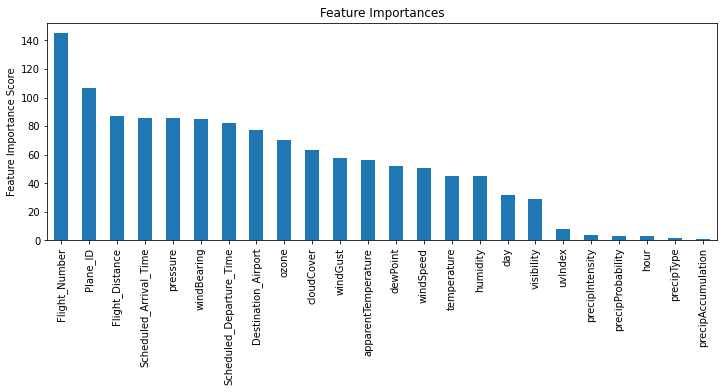

In [33]:
# Create an Extreme Gradient Boosting classifier and feed it into the model fit function
boost =  xgb.XGBClassifier(
 learning_rate = .1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(boost, x_train, labels_train_1)

### The above figure shows the most important features 

In [34]:
# Evaluate 
boost_pred = boost.predict(x_val)
boost_probs = boost.predict_proba(x_val)

# Creates confustion matrix and prints it out
cm = metrics.confusion_matrix(y_val, boost_pred)
print("Confusion matrix")
print(pd.DataFrame(cm))

#Creates and print out the precision, recall, f1, and auc scores 
report_rf = metrics.precision_recall_fscore_support(list(y_val), 
                                                    list(boost_pred), average='binary')

print ("\nprecision = %0.2f\nrecall = %0.2f\nF1 = %0.2f\nAUC Score = %0.2f\n" % \
        (report_rf[0], 
         report_rf[1], 
         report_rf[2], 
         metrics.roc_auc_score(list(y_val.values), boost_probs[:,1])))

Confusion matrix
     0   1
0  570  22
1  160  36

precision = 0.62
recall = 0.18
F1 = 0.28
AUC Score = 0.70



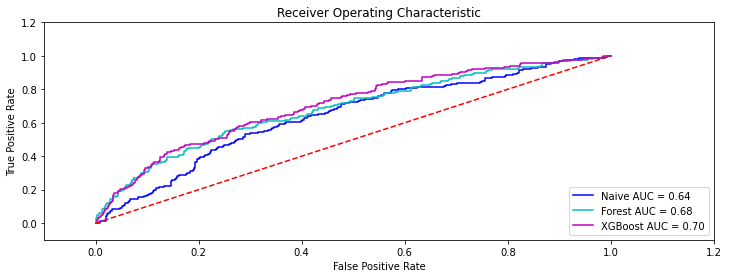

In [31]:
# Creating and plotting the ROC Curve

plt.title('Receiver Operating Characteristic')
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(list(y_val), naive_probs[:, 1])
naive_roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='Naive AUC = %0.2f'% naive_roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(list(y_val), forest_probs[:, 1])
forest_roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'c', label='Forest AUC = %0.2f'% forest_roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(list(y_val), boost_probs[:, 1])
boost_roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'm', label='XGBoost AUC = %0.2f'% boost_roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The XGBoost AUC gets up to `0.70`

## Future Work
Here are the ideas for future enhancements:
### 1. Data 
Using a bigger data set will improve the prediction accuracy because it will eliminate the risk of overfitting/underfitting
### 2. Data insights 
1. Extend the analysis of features to investigate the potential relationship between multiple features to both proportions of flights delayed as well as the duration of flight delays.
 
### 3. Hyperparameter optimization
Try different methods to determine the best parameters for `xgboost` algorithm. [reference](https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f)
### 4. Clustering Approaches
Try the deep learning clustering approach and compare the performance 